<a href="https://colab.research.google.com/github/Axl11475581/TensorFlow-Certificate/blob/main/3_0_CNN_%26_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is the Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images are from the Food101 dataset from kaggle, however they has been modified to only use two classes, pizza & steak, using the image data modification notebook.

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-06-10 13:22:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.193.128, 172.217.204.128, 172.217.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   157MB/s    in 0.7s    

2021-06-10 13:22:35 (157 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



## Inspect the data

A very crucial step at the beginning of any machine learning project is becoming one with the data.
And for a computer vision project this means visualizing many samples of the data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [ ]:
# The extra file in the pizza_steak directory is ".DS_Store"
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Jun 10 13:22 .
drwxr-xr-x 1 root root 4096 Jun 10 13:22 ..
-rw-r--r-- 1 root root 6148 Jun 10 13:22 .DS_Store
drwxr-xr-x 4 root root 4096 Jun 10 13:22 test
drwxr-xr-x 4 root root 4096 Jun 10 13:22 train


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize the images, first let's get the class names programmatically.

In [ ]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) 
# Created a list of class_names from the subdirectories
class_names = class_names[1:] # Remove .DS_Store
print(class_names)

['pizza' 'steak']


In [ ]:
# Visualize the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


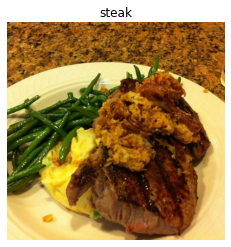

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [ ]:
# View the img (actually just a big array/tensor)
img

array([[[116,  78,  31],
        [ 95,  56,  13],
        [ 88,  49,  10],
        ...,
        [183, 113,  43],
        [159,  87,  15],
        [137,  63,   0]],

       [[127,  86,  40],
        [101,  58,  16],
        [ 77,  33,   0],
        ...,
        [186, 117,  48],
        [178, 108,  39],
        [167,  94,  25]],

       [[129,  82,  40],
        [ 95,  47,   7],
        [ 70,  21,   0],
        ...,
        [156,  91,  25],
        [161,  96,  30],
        [161,  93,  28]],

       ...,

       [[251, 236, 153],
        [251, 236, 153],
        [252, 237, 154],
        ...,
        [250, 225, 135],
        [250, 225, 135],
        [250, 225, 135]],

       [[251, 236, 153],
        [251, 236, 153],
        [252, 237, 154],
        ...,
        [251, 226, 136],
        [251, 226, 136],
        [251, 226, 136]],

       [[251, 236, 151],
        [251, 236, 151],
        [252, 237, 154],
        ...,
        [252, 227, 137],
        [252, 227, 137],
        [252, 227, 137]]

In [ ]:
# The imported image are actually giant arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[116,  78,  31],
        [ 95,  56,  13],
        [ 88,  49,  10],
        ...,
        [183, 113,  43],
        [159,  87,  15],
        [137,  63,   0]],

       [[127,  86,  40],
        [101,  58,  16],
        [ 77,  33,   0],
        ...,
        [186, 117,  48],
        [178, 108,  39],
        [167,  94,  25]],

       [[129,  82,  40],
        [ 95,  47,   7],
        [ 70,  21,   0],
        ...,
        [156,  91,  25],
        [161,  96,  30],
        [161,  93,  28]],

       ...,

       [[251, 236, 153],
        [251, 236, 153],
        [252, 237, 154],
        ...,
        [250, 225, 135],
        [250, 225, 135],
        [250, 225, 135]],

       [[251, 236, 153],
        [251, 236, 153],
        [252, 237, 154],
        ...,
        [251, 226, 136],
        [251, 226, 136],
        [251, 226, 136]],

       [[251, 236, 151],
        [251, 236, 151],
        [252, 237, 154],
        ...,
        [252, 227, 13

In [ ]:
# View the image shape
img.shape # returns (width, height, colour channels)

(512, 512, 3)

In [ ]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.45490196, 0.30588235, 0.12156863],
        [0.37254902, 0.21960784, 0.05098039],
        [0.34509804, 0.19215686, 0.03921569],
        ...,
        [0.71764706, 0.44313725, 0.16862745],
        [0.62352941, 0.34117647, 0.05882353],
        [0.5372549 , 0.24705882, 0.        ]],

       [[0.49803922, 0.3372549 , 0.15686275],
        [0.39607843, 0.22745098, 0.0627451 ],
        [0.30196078, 0.12941176, 0.        ],
        ...,
        [0.72941176, 0.45882353, 0.18823529],
        [0.69803922, 0.42352941, 0.15294118],
        [0.65490196, 0.36862745, 0.09803922]],

       [[0.50588235, 0.32156863, 0.15686275],
        [0.37254902, 0.18431373, 0.02745098],
        [0.2745098 , 0.08235294, 0.        ],
        ...,
        [0.61176471, 0.35686275, 0.09803922],
        [0.63137255, 0.37647059, 0.11764706],
        [0.63137255, 0.36470588, 0.10980392]],

       ...,

       [[0.98431373, 0.9254902 , 0.6       ],
        [0.98431373, 0.9254902 , 0.6       ],
        [0.98823529, 0

In [22]:
# Normalize the data
# Get all the pixel values between 0 & 1
img/255

array([[[0.45490196, 0.30588235, 0.12156863],
        [0.37254902, 0.21960784, 0.05098039],
        [0.34509804, 0.19215686, 0.03921569],
        ...,
        [0.71764706, 0.44313725, 0.16862745],
        [0.62352941, 0.34117647, 0.05882353],
        [0.5372549 , 0.24705882, 0.        ]],

       [[0.49803922, 0.3372549 , 0.15686275],
        [0.39607843, 0.22745098, 0.0627451 ],
        [0.30196078, 0.12941176, 0.        ],
        ...,
        [0.72941176, 0.45882353, 0.18823529],
        [0.69803922, 0.42352941, 0.15294118],
        [0.65490196, 0.36862745, 0.09803922]],

       [[0.50588235, 0.32156863, 0.15686275],
        [0.37254902, 0.18431373, 0.02745098],
        [0.2745098 , 0.08235294, 0.        ],
        ...,
        [0.61176471, 0.35686275, 0.09803922],
        [0.63137255, 0.37647059, 0.11764706],
        [0.63137255, 0.36470588, 0.10980392]],

       ...,

       [[0.98431373, 0.9254902 , 0.6       ],
        [0.98431373, 0.9254902 , 0.6       ],
        [0.98823529, 0

## A (Typical) architecture of a convolutional neural network

Convolutional neural networks are no different to other kinds of deep learning neural networks in the fact they can be created in many different ways. What you see below are some components you'd expect to find in a traditional CNN.

Components of a convolutional neural network:

* Input Image(s): Target images you'd like to discover patterns in. Whatever you can take a photo (or video) of.
* Input layer: takes in target images and preprocesses them for further layers. `input_shape = [batch_size, image_height, image_width, color_channels]`
* Convolution layer: Extracts/learns the most important features from target images. `multiple, can create with tf.keras.layers.ConvXD(X can be multiple values)`
* Hidden activation: Adds non-linerity to learned features (non-straight lines). Usually ReLU `tf.keras.activations.relu`
* Pooling layer: Reduces the dimensionality of learned image features. Average `tf.keras.layers.AvgPool2D` or Max `tf.keras.layers.MaxPool2D`
* Fully connected layer: Futher refines learned features from convolution layers. `tf.keras.layers.Dense`
* Output layer: Takes learned features and outputs them in shape of target labels. `output_shape = [number_of_classes]` (e.g. 3 for pizza, steak or sushi)
* Output activation: Adds non-linearities to output layer. `tf.keras.activations.sigmoid` (binary classification) or `tf.keras.activation.sofmax`

## An end-to-end example

We've checked out the data and found there's 750 training images, as well as 250 test images per class and they're all of various different shapes. 

Reading the original dataset authors paper, we see they used a Random Forest machine learning model and averaged 50.76% accuracy at predicting what different foods different images had in them. From now on, that 50,76% will be our baseline. 

The code in the following cell replicate an end-to-end way to model the pizza_steak dataset with a convolutional neural network (CNN) using the components listed above.

- Resource: The architecture we're using below is a scaled-down version of VGG-16, a convolutinal neural network which came 2nd in 2014 ImageNet classification competition.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))